## Introduction
We will use the the *Statlog/Satellite* dataset to illustrate the KMeans clustering algorithm. The dataset contains 6435 instances, 36 attributes and 7 classes. The dataset is available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29). 

* Please follow the above link to read the description of the dataset.

## Importing the dataset and libraries
We will use the *pandas* library to import the dataset and the *scikit-learn* library to perform the clustering. We will also use the *matplotlib* library to plot the results. We will also use the *seaborn* library for visualisation.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Load the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn"
data = pd.read_csv(url, header=None, delim_whitespace=True)

# Extract the features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


## KMeans Clustering
The code below performs KMeans on `X` varying the number of clusters from 1 to 10. The *sum of the squared distances (SSD)* are recorded in the `inertia_` attribute. The code also plots the results:

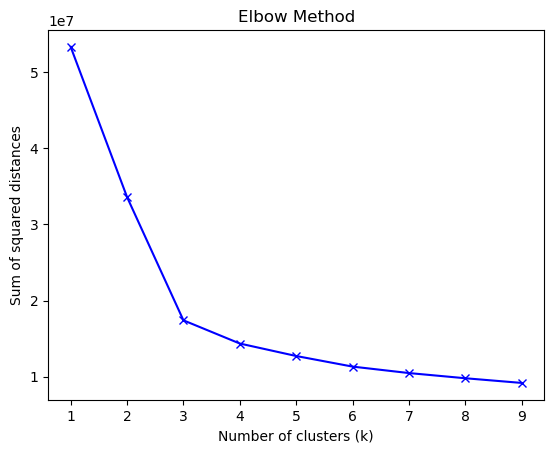

In [4]:
# Define a list of values of k to try
ks = range(1, 10)

# Initialise an empty list to store the sum of squared distances for each k
ssd = []

# Iterate over the values of k and calculate the sum of squared distances
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot the sum of squared distances for each value of k
plt.plot(ks, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

* Using the *elbow method*, we can see that the optimal number of clusters could be 3.

In [5]:
# Choose the value of k from the elbow method (in this case, let's say k=3)
k = 3

# Run KMeans with the chosen value of k
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
data['cluster'] = labels

# Print the number of samples in each cluster
print(data['cluster'].value_counts())

0    2017
1    1996
2     422
Name: cluster, dtype: int64


We can verify how the clusters are correlated to the actual classes by plotting a 2D histogram as follows:

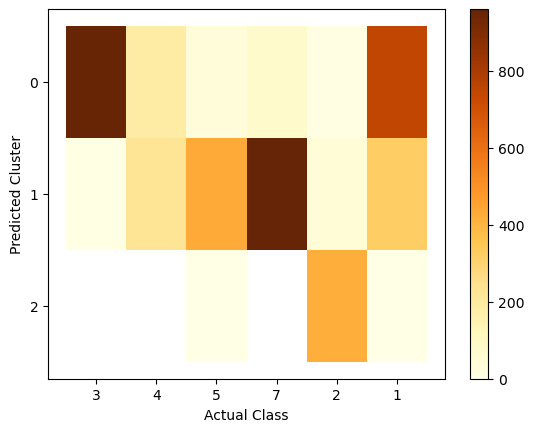

In [6]:
# convert labels to strings
y = y.astype(str)
labels = labels.astype(str)

# Create a 2D histogram of the actual class labels vs. the predicted cluster labels
sns.histplot(x=y, y=labels, cbar=True, cmap='YlOrBr')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Cluster')
plt.show()

Changing the number of clusters to 2 and 4. How does the clustering change? and the correlation with the actual classes?

0    2385
1    2050
Name: cluster, dtype: int64


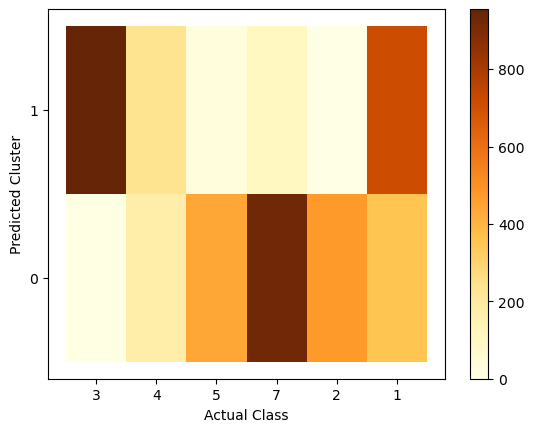

In [7]:
k = 2

# Run KMeans with the chosen value of k
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
data['cluster'] = labels

# Print the number of samples in each cluster
print(data['cluster'].value_counts())

y = y.astype(str)
labels = labels.astype(str)

# Create a 2D histogram of the actual class labels vs. the predicted cluster labels
sns.histplot(x=y, y=labels, cbar=True, cmap='YlOrBr')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Cluster')
plt.show()

3    1546
1    1288
0    1193
2     408
Name: cluster, dtype: int64


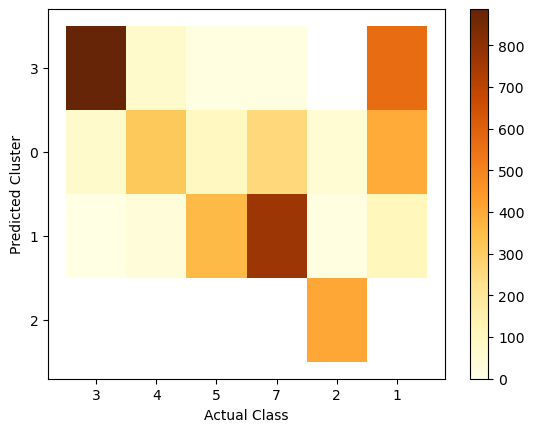

In [8]:
k = 4

# Run KMeans with the chosen value of k
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
data['cluster'] = labels

# Print the number of samples in each cluster
print(data['cluster'].value_counts())

y = y.astype(str)
labels = labels.astype(str)

# Create a 2D histogram of the actual class labels vs. the predicted cluster labels
sns.histplot(x=y, y=labels, cbar=True, cmap='YlOrBr')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Cluster')
plt.show()